<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1]:
import pandas as pd
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python 
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

In [3]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

#connection.close()
connection.status

1

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [4]:
# текст запроса
# функция count - считает количество строк
query_3_1 = f'''
select
    count(*)
from
    public.vacancies
'''

In [5]:
# результат запроса
df = pd.read_sql_query(query_3_1,connection)
df

C:\Users\Alex\AppData\Local\Temp\ipykernel_3340\1729124274.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_1,connection)


,count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [6]:
# текст запроса
# функция count - считает количество строк
query_3_2 = f'''
select
    count(*)
from
    public.employers
'''

In [7]:
# результат запроса
df = pd.read_sql_query(query_3_2,connection)
df

C:\Users\Alex\AppData\Local\Temp\ipykernel_3340\1170978344.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_2,connection)


,count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [8]:
# текст запроса
# функция count - считает количество строк
query_3_3 = f'''
select
    count(*)
from
    public.areas
'''

In [9]:
# результат запроса
df = pd.read_sql_query(query_3_3,connection)
df

C:\Users\Alex\AppData\Local\Temp\ipykernel_3340\3898647409.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_3,connection)


,count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [10]:
# текст запроса
# функция count - считает количество строк
query_3_4 = f'''
select
    count(*)
from
    public.industries
'''

In [11]:
# результат запроса
df = pd.read_sql_query(query_3_4,connection)
df

C:\Users\Alex\AppData\Local\Temp\ipykernel_3340\1880849151.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_4,connection)


,count
0,294


***

In [12]:
# выводы по предварительному анализу данных
# Количество вакансий - 49197
# Количество работодателей - 23501
# Количество регионов - 1362
# Количество сфер деятельности - 294
# 


# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [13]:
# текст запроса
# соединяем таблицы vacancies и areas через inner join по id регионов,
# группируем по наименованию региона и считаем количество вакансий и
# сортируем по убыванию этого количества
query_4_1 = f'''
select
    a.name area,
    count(v.id) cnt
from
    public.vacancies v
    join public.areas a on v.area_id=a.id 
group by 1
order by 2 DESC
'''

In [14]:
# результат запроса
df = pd.read_sql_query(query_4_1,connection)
df.head()

C:\Users\Alex\AppData\Local\Temp\ipykernel_3340\3932554720.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_1,connection)


,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [15]:
# текст запроса
# определяем у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой
query_4_2 = f'''
select
    count(id) cnt
from
    public.vacancies 
where salary_from is not null or salary_to is not null
'''

In [16]:
# результат запроса
df = pd.read_sql_query(query_4_2,connection)
df.head()

C:\Users\Alex\AppData\Local\Temp\ipykernel_3340\3008047644.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_2,connection)


,cnt
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [17]:
# текст запроса
# находим среднее и округляем
query_4_3 = f'''
select
    round(avg(salary_from)) avg_from,
    round(avg(salary_to)) avg_to
from
    public.vacancies 
'''

In [18]:
# результат запроса
df = pd.read_sql_query(query_4_3,connection)
df

C:\Users\Alex\AppData\Local\Temp\ipykernel_3340\3309279565.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_3,connection)


,avg_from,avg_to
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [19]:
# текст запроса
# группируем по первым двум полям, считаем количество третьего поля и сортируем по нему по убыванию.
# выводим одну строку пропустив первую 
query_4_4 = f'''
select
    schedule,
    employment,
    count(id)
from
    public.vacancies
group by 1, 2
order by count(id) desc
offset 1
limit 1
'''

In [20]:
# результат запроса
df = pd.read_sql_query(query_4_4,connection)
df

C:\Users\Alex\AppData\Local\Temp\ipykernel_3340\2166644490.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_4,connection)


,schedule,employment,count
0,Удаленная работа,Полная занятость,7802


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [21]:
# текст запроса
# группируем по первому полю, считаем количество второго поля и сортируем по нему по возрастанию.
query_4_5 = f'''
select
    experience,
    count(id)
from
    public.vacancies
where experience is not null
group by 1
order by count(id)
'''

In [22]:
# результат запроса
df = pd.read_sql_query(query_4_5,connection)
df

C:\Users\Alex\AppData\Local\Temp\ipykernel_3340\1722615915.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_5,connection)


,experience,count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

In [23]:
# выводы по детальному анализу вакансий
# Чем крупнее город, тем больше вакансий.
# Больше чем у половины вакансий нет данных по уровню ЗП.
# Средняя нижняя граница ЗП = 71065, а верхняя граница ЗП =	110537.
# Большинство вакансий на полный рабочий день и полную занятость.
# Большинство вакансий с требуемым опытом от 1 до 6 лет. Меньше всего вакансий с опытом от 6 лет. 


# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [24]:
# текст запроса
# после внутреннего объединения группируем по названиям работодателей и считаем количество вакансий. 
# упорядочиваем по убыванию количества, берем первые 5
query_5_1 = f'''
select
    e.name,
    count(v.id)
from
    public.vacancies v
    join public.employers e on v.employer_id=e.id
group by e.name
order by count(v.id) desc
limit 5
'''

In [25]:
# результат запроса
df = pd.read_sql_query(query_5_1,connection)
df

C:\Users\Alex\AppData\Local\Temp\ipykernel_3340\1065406385.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_1,connection)


,name,count
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [26]:
# текст запроса
# к регионам левым соединениям присоединяю количество работодателей и вакансий.
# устанавливаю отбор на количество вакансий = 0, упорядочиваю по убыванию количества работодателей
query_5_2 = f'''
select
    a.name,
    count(e.id) cnt_emp,
    count(v.id) cnt_vac
from
    public.areas a
    left join public.employers e on a.id=e.area
    left join public.vacancies v on a.id=v.area_id
group by 1
having count(v.id)=0
order by 2 desc
'''

In [27]:
# результат запроса
df = pd.read_sql_query(query_5_2,connection)
df

C:\Users\Alex\AppData\Local\Temp\ipykernel_3340\3039681661.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_2,connection)


,name,cnt_emp,cnt_vac
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Ростовская область,18,0
...,...,...,...
588,Струнино,0,0
589,Славгород (Алтайский край),0,0
590,Сорочинск,0,0
591,Ленинский (Тульская область),0,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [28]:
# текст запроса
# к вакансиям присоединяю количество регионов.
# группирую по работодателям, упорядочиваю по убыванию количества регионов
query_5_3 = f'''
select
    e.name,
    count(distinct area_id)
from
    public.vacancies v
    join public.employers e on e.id=v.employer_id 
group by 1
order by 2 desc
'''

In [29]:
# результат запроса
df = pd.read_sql_query(query_5_3,connection)
df.head()

C:\Users\Alex\AppData\Local\Temp\ipykernel_3340\1600536517.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_3,connection)


,name,count
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [30]:
# текст запроса
# к работодателям присоединяю левым соединением сферы деятельности работодателей равные null
query_5_4 = f'''
select
    count(id)
from
    public.employers
    left join public.employers_industries on id=employer_id
where industry_id is null
'''

In [31]:
# результат запроса
df = pd.read_sql_query(query_5_4,connection)
df

C:\Users\Alex\AppData\Local\Temp\ipykernel_3340\3553459310.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_4,connection)


,count
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [32]:
# текст запроса
# По полю id к работодателям присоединяю левым соединением сферы деятельности работодателей не равные null.
# Группирую по id работодателя и беру количество сфер деятельности = 4.
# Сортирую по названию компаний, интересует компания третья по порядку
query_5_5 = f'''
select
    name,
    count(distinct industry_id)
from
    public.employers
    left join public.employers_industries on id=employer_id
where industry_id is not null
group by id
having count(distinct industry_id)=4
order by name
offset 2
limit 1
'''

In [33]:
# результат запроса
df = pd.read_sql_query(query_5_5,connection)
df.head()

C:\Users\Alex\AppData\Local\Temp\ipykernel_3340\591337335.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_5,connection)


,name,count
0,2ГИС,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [34]:
# текст запроса 
# внутреннее соединение таблиц industries и employers_industries по id сферы деятельности
# отбор по наименованию сферы деятельности = 'Разработка программного обеспечения'
# группирую по industry_id и считаю количество различных работодателей
query_5_6 = f'''
select
    industry_id,
    count(distinct employer_id)
from
    public.industries
    join public.employers_industries on id=industry_id
where name='Разработка программного обеспечения'
group by industry_id
'''

In [35]:
# результат запроса
df = pd.read_sql_query(query_5_6,connection)
df

C:\Users\Alex\AppData\Local\Temp\ipykernel_3340\2938330085.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_6,connection)


,industry_id,count
0,7.540,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [36]:
# код для получения списка городов-милионников
import requests # Импортируем библиотеку requests
from bs4 import BeautifulSoup
URL = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8'
response = requests.get(url=URL) # Делаем GET-запрос к ресурсу и результат ответа сохраняем в переменной response.
page = BeautifulSoup(response.text,'html.parser') # Парсим текст ответа на запрос 
city_list = []
for link in page.find_all('a')[52:68]: # находим все ссылки и беру срез с городами
    city_list.append(link.text) # заполняем список городами-миллионниками
    
print(city_list)

['Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород', 'Красноярск', 'Челябинск', 'Самара', 'Уфа', 'Ростов-на-Дону', 'Краснодар', 'Омск', 'Воронеж', 'Пермь', 'Волгоград']


In [37]:
# текст запроса
# Делаю запрос в котором к таблице vacancies присоединяю employers по полю employer_id и areas по полю area_id,
# с отбором наименованию работодалеля = 'Яндекс' и регионам из списка городов-миллионников,
# сохранив результат во временной таблице filter_city.
# Далее делаю два запроса ко временной таблице filter_city: в первом подсчитав количество вакансий для каждого города-миллионника;
# во втором подсчитав общее количество вакансий для этих городов.
# Объединяю результаты этих двух запросов и сортирую по количеству.
query_5_7 = f'''
with filter_city as (
    select
        a.name city,
        v.id vac
    from
        public.vacancies v
        join public.employers e on e.id=v.employer_id
        join public.areas a on a.id=v.area_id
    where e.name='Яндекс'
        and a.name in {tuple(city_list)})

select
    city,
    count(vac) cnt
from
    filter_city
group by city

union

select
    'total',
    count(vac) 
from
    filter_city
order by 2
'''

In [38]:
# результат запроса
df = pd.read_sql_query(query_5_7,connection)
df

C:\Users\Alex\AppData\Local\Temp\ipykernel_3340\2337172344.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_7,connection)


,city,cnt
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


***

In [39]:
# выводы по анализу работодателей
# Топ 5 работодателей по количеству вакансий: Яндекс(1933), Ростелеком(491), Тинькофф(444), СБЕР(428), Газпром нефть(331)
# В базе есть регионы с представленными там работодателями, но без открытых вакансий.
# Топ 5 работодателей по количеству регионов: Яндекс(181), Ростелеком(152), Спецремонт(116), Поляков Денис Иванович(88), ООО ЕФИН(71)
# 8419 работодателей не указали сферу деятельности
# 3553 работодателей указали сферу деятельности как 'Разработка программного обеспечения'

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [40]:
# текст запроса
# Считаю количество вакансий в которых после приведения к нижнему регистру присутствует строка 'data' либо 'данн'
query_6_1 = f'''
select
    count(id)
from
    public.vacancies
where lower(name) like '%data%' 
    or lower(name) like '%данн%'
'''

In [41]:
# результат запроса
df = pd.read_sql_query(query_6_1,connection)
df

C:\Users\Alex\AppData\Local\Temp\ipykernel_3340\1520672217.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_1,connection)


,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [42]:
# текст запроса
# Считаю количество вакансий с отбором подходящих для дата-сайентистов и для джунов
query_6_2 = f'''
select
    count(id)
from
    public.vacancies
where (
    name ilike '%data scientist%' 
    or name ilike '%data science%'
    or name ilike '%исследователь данных%'
    or (name like '%ML%' and not name ilike '%html%')
    or name ilike '%machine learning%'
    or name ilike '%машинн%обучен%'
    )
    and (
        name ilike '%junior%'
    or experience ilike '%Нет опыта%'
    or employment ilike '%Стажировка%'
    )
'''

In [43]:
# результат запроса
df = pd.read_sql_query(query_6_2,connection)
df

C:\Users\Alex\AppData\Local\Temp\ipykernel_3340\1041952921.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_2,connection)


,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [44]:
# текст запроса
# Считаю количество вакансий с отбором подходящих для дата-сайентистов и со скилом в 'SQL' или 'postgres' без учета регистра
query_6_3 = f'''
select
    count(id)
from
    public.vacancies
where (
    name ilike '%data scientist%' 
    or name ilike '%data science%'
    or name ilike '%исследователь данных%'
    or (name like '%ML%' and not name ilike '%html%')
    or name ilike '%machine learning%'
    or name ilike '%машинн%обучен%'
    )
    and (key_skills ilike '%SQL%' 
    or key_skills ilike '%postgres%')
'''

In [45]:
# результат запроса
df = pd.read_sql_query(query_6_3,connection)
df

C:\Users\Alex\AppData\Local\Temp\ipykernel_3340\3683206453.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_3,connection)


,count
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [46]:
# текст запроса
# Считаю количество вакансий с отбором подходящих для дата-сайентистов и со скилом в 'python' без учета регистра
query_6_4 = f'''
select
    count(id)
from
    public.vacancies
where (
    name ilike '%data scientist%' 
    or name ilike '%data science%'
    or name ilike '%исследователь данных%'
    or (name like '%ML%' and not name ilike '%html%')
    or name ilike '%machine learning%'
    or name ilike '%машинн%обучен%'
    )
    and key_skills ilike '%python%'
'''

In [47]:
# результат запроса
df = pd.read_sql_query(query_6_4,connection)
df

C:\Users\Alex\AppData\Local\Temp\ipykernel_3340\3924223682.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_4,connection)


,count
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [48]:
# текст запроса
# Беру вакансии с отбором подходящих для дата-сайентистов и заполненным скилом
# Т.к. скилы в вакансии указаны через символ '\', то количество скилов = количество символов '\' + 1.
# Количество символов '\' находим из разности длин исходной строки и строки после удаления из нее этого символа '\'.
# Нахожу среднее по таблице и округляю 
query_6_5 = f'''
select
    round(avg(length(key_skills) - length(replace(key_skills,CHR(9),'')) + 1),2) as cnt
from
    public.vacancies
where (
    name ilike '%data scientist%' 
    or name ilike '%data science%'
    or name ilike '%исследователь данных%'
    or (name like '%ML%' and not name ilike '%html%')
    or name ilike '%machine learning%'
    or name ilike '%машинн%обучен%'
    )
    and not key_skills is null 
'''

In [49]:
# результат запроса
df = pd.read_sql_query(query_6_5,connection)
df

C:\Users\Alex\AppData\Local\Temp\ipykernel_3340\965758319.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_5,connection)


,cnt
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [50]:
# текст запроса
# Беру вакансии с отбором подходящих для дата-сайентистов и с неполностью пустыми данными по ЗП
# Если непустые обе колонки по ЗП, то считаем как среднее арифметическое
# Группирую по опыту, нахожу среднюю ЗП и оркугяю.  
query_6_6 = f'''
select
    experience,
    round(avg(coalesce((salary_from + salary_to)/2,coalesce(salary_from,salary_to)))) salary
from
    public.vacancies 
where 
    (name ilike '%data scientist%' 
    or name ilike '%data science%'
    or name ilike '%исследователь данных%'
    or (name like '%ML%' and not name ilike '%html%')
    or name ilike '%machine learning%'
    or name ilike '%машинн%обучен%')
    and (salary_from is not null or salary_to is not null)
group by 1
'''

In [51]:
# результат запроса
df = pd.read_sql_query(query_6_6,connection)
df


C:\Users\Alex\AppData\Local\Temp\ipykernel_3340\2105182819.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_6,connection)


,experience,salary
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


***

In [52]:
# выводы по предметному анализу
# 1771 вакансия имеет отношение к анализу данных
# 51 вакансия подойдет для джунов дата-сайентистов
# 201 вакансия для дата-сайентистов со скилом SQL или postgres
# 351 вакансия для дата-сайентистов с ключевым навыком python
# 6.41 ключевых наввыков в среднем требуются для дата-сайентистов
# На старте средняя ЗП составляет 75 т.р, с опытом от 1 до 3 лет ЗП почти удваивается(140 т.р.),
# после 3 и до 6 лет еще увеличивается почти вдвое(243 т.р.).

# Общий вывод по проекту

In [53]:
# подведем итог исследования, обобщите выводы
# Хороший рост ЗП по профессии Дата-сайентист.
# В базе присутствуют вакансии как для джунов так и для опытных Дата-сайентистов.
#
# В этом проекте мы поключились к БД PostgreSQL с помощью пакета psycorg2,
# применили полученные знания по написанию запросов SQL, 
# использовали библиотеку requests для получения данных из с сайта Википедия,
# а также BeautifulSoup для обработки полученных данных.

# здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы,
# продумать варианты продолжения исследования
# 
# Анализируя самые востребованные скилы вакансий в целом и для data science в частности,
# можно сделать вывод что мы идем в верном направлении.
# Английский язык также вошел в топ 10 скилов, поэтому нужно его учить. 

In [54]:
# Выведем ТОП-10 скилов среди всех вакансий
query_7_1 = f'''
select 
    regexp_split_to_table(key_skills, chr(9)) as key_skill,
    count(id) as cnt
from
    public.vacancies
group by 1
order by 2 desc
limit 10
'''
df_top_all = pd.read_sql_query(query_7_1,connection)
df_top_all

C:\Users\Alex\AppData\Local\Temp\ipykernel_3340\3370208760.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top_all = pd.read_sql_query(query_7_1,connection)


,key_skill,cnt
0,SQL,6977
1,Git,4731
2,Английский язык,4525
3,Работа в команде,3923
4,Linux,3747
5,JavaScript,3625
6,Python,3445
7,Управление проектами,2764
8,1С программирование,2647
9,PostgreSQL,2452


C:\Users\Alex\AppData\Local\Temp\ipykernel_3340\3896440986.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top_ds = pd.read_sql_query(query_7_2,connection)


,key_skill,cnt
0,Python,348
1,SQL,191
2,Machine Learning,114
3,Git,66
4,Математическая статистика,62
5,Data Analysis,54
6,Pandas,52
7,Data Science,52
8,ML,49
9,Английский язык,48


Text(0, 0.5, 'Скил')

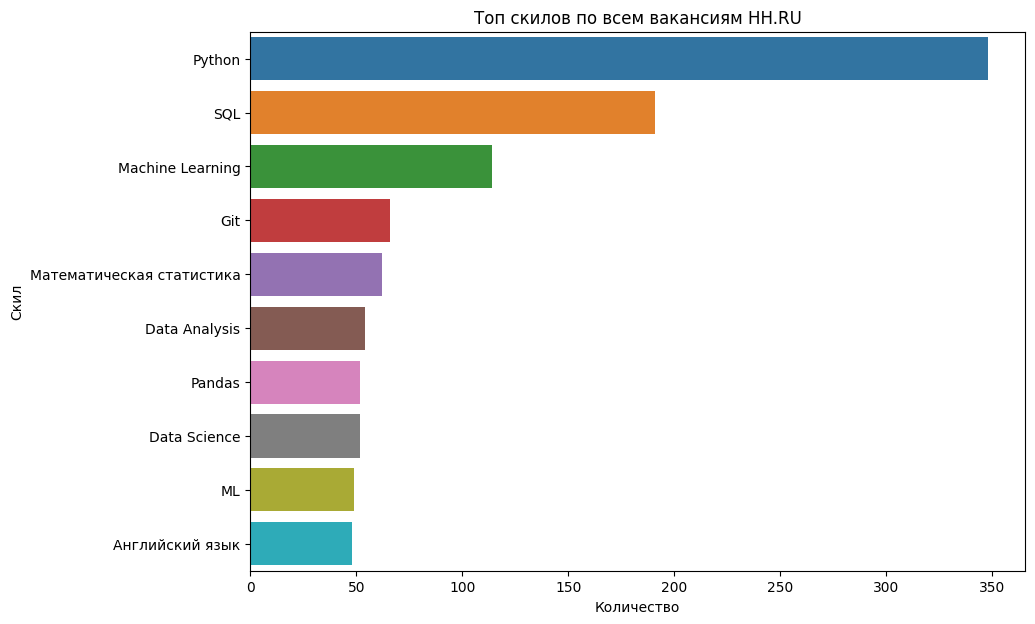

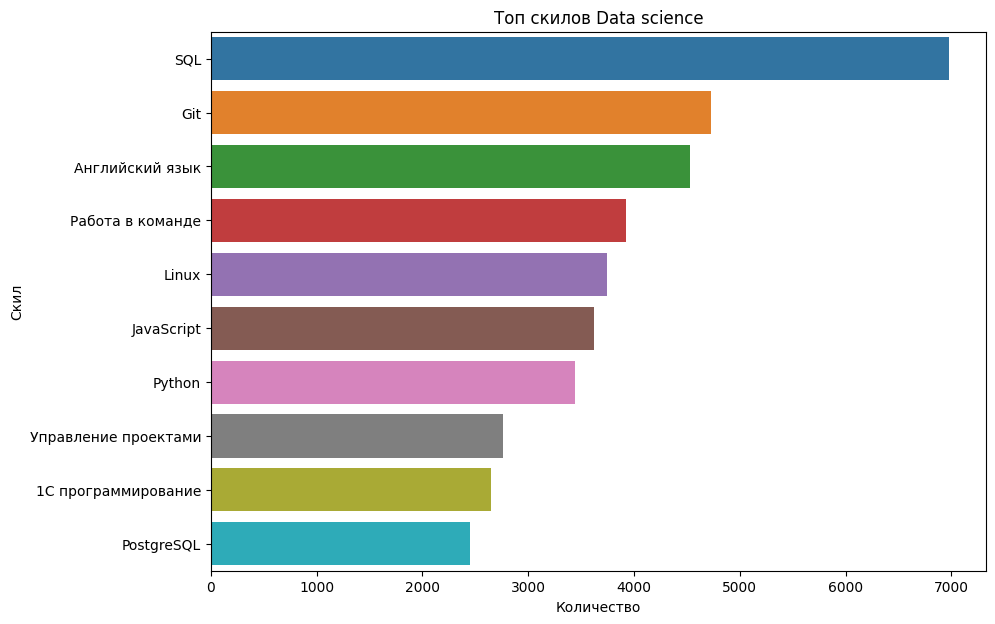

In [57]:
# Выведем ТОП-10 скилов среди всех вакансий для data science
query_7_2 = f'''
select 
    regexp_split_to_table(key_skills, chr(9)) as key_skill,
    count(id) as cnt
from
    public.vacancies
where (
    name ilike '%data scientist%' 
    or name ilike '%data science%'
    or name ilike '%исследователь данных%'
    or (name like '%ML%' and not name ilike '%html%')
    or name ilike '%machine learning%'
    or name ilike '%машинн%обучен%'
    )
group by 1
order by 2 desc
limit 10
'''
df_top_ds = pd.read_sql_query(query_7_2,connection)
display(df_top_ds)

fig = plt.figure(figsize=(10,7))
barplot = sns.barplot(data=df_top_ds,
                      x='cnt',
                      y='key_skill')
barplot.set_title('Топ скилов по всем вакансиям HH.RU')
barplot.set_xlabel('Количество')
barplot.set_ylabel('Скил')

fig = plt.figure(figsize=(10,7))
barplot = sns.barplot(data=df_top_all,
                      x='cnt',
                      y='key_skill')
barplot.set_title('Топ скилов Data science')
barplot.set_xlabel('Количество')
barplot.set_ylabel('Скил')



#connection.close()